### <span style="color:#FF884D"> Imports and data import </span>

In [15]:
# import numpy as np
import pandas as pd
import statsmodels as sm
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy import stats
import scipy.stats as stats
import plotly.express as px
import numpy as np

data = pd.read_csv("data.csv")
data


,Unnamed: 0,Gender,Age,Sport Frequency,Type of Sport,Ever used Sportapp,Frequency Sportapp,Reason sportapp,Goals more efficient through sportapp,Motivation when comparing to friends,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation,numSports,compare,track performance,mean of Intrinsic motivations
0,0,Weiblich,22,5,"Joggen, Ballsportarten, Schwimmen",Ja,1,"Zum Tracken meiner Leistungen, Um mir Ziele zu...",Ja,Nein,1.25,2.75,4.00,3.50,4.25,4.25,2,0,1,4.000000
1,1,Weiblich,23,3,"Fitness-Kurse, Tanzen",Ja,1,"Zum Tracken meiner Leistungen, Um das Training...",Ja,Ja,3.00,3.00,4.00,3.75,3.25,3.50,1,1,1,3.500000
2,2,Weiblich,25,3,"Joggen, Kraftsport, Ballsportarten",Ja,1,Zum Tracken meiner Leistungen,Ja,Nein,1.25,2.00,4.50,3.00,4.25,4.25,2,0,1,3.833333
3,3,Weiblich,18,3,"Kraftsport, Ballsportarten",Ja,1,"Zum Tracken meiner Leistungen, Um einen Sport-...",Ja,Nein,1.50,2.25,3.25,3.75,5.00,4.00,1,0,1,4.250000
4,4,Weiblich,18,1,"Ballsportarten, Fahrrad fahren",Ja,0,Zum Tracken meiner Leistungen,Ja,Nein,2.25,2.00,3.00,3.00,3.75,2.50,1,0,1,3.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,108,Weiblich,65,5,Walken,Nein,0,Benutze keine Sportapp,Nein,Nein,1.00,1.00,2.00,1.00,1.00,1.00,0,0,0,1.000000
109,109,Männlich,54,0,"Schwimmen, Radfahren",Nein,0,Um mir Ziele zu setzen,Nein,Nein,1.00,1.50,2.75,1.50,1.75,1.75,1,0,0,1.666667
110,110,Weiblich,64,3,Fitness-Kurse,Ja,1,"Zum Tracken meiner Leistungen, Um Kurse zu Buc...",Ja,Nein,1.50,2.00,4.75,3.50,3.50,4.25,0,0,1,3.750000
111,111,Männlich,24,3,Badminton,Ja,1,"Zum Tracken meiner Leistungen, Um das Training...",Ja,Ja,2.50,2.25,3.75,3.50,3.75,4.25,0,1,1,3.833333


### <span style="color:#FF884D"> Unpaired T-Test </span>
### <span>H₀: The Amotivation is equal when people are 25 or younger. </span>

In [16]:
# Assuming you have two arrays of amotivation scores for the two groups

group1 = data[data['Age'] <= 25]['Amotivation']
group2 = data[data['Age'] > 25]['Amotivation']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)

T-Statistic: 0.6740134484464786
P-value: 0.5017039750750504


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span>H₀: The Amotivation is equal when people are 25 or younger. </span>

In [17]:
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2)

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1339.5
P-value: 0.1603875735893293


In [18]:
# cohens d to calculate effect size 
def cohens_d(group1,group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1,ddof=1)**2+np.std(group2,ddof=1)**2)/2)
    effect_size= mean_diff/pooled_std
    return effect_size

### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span>H₀: The Intrinsic Motivation is similar when people are doing Sports more than 2 times a week. </span>

In [19]:

# Separate the data into two groups based on sports frequency
group1 = data[data['Sport Frequency'] >= 3]['Intrinsic Motivation']
group2 = data[data['Sport Frequency'] < 3]['Intrinsic Motivation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))

Mann-Whitney U statistic: 1983.0
P-value: 0.0010722548671885884
0.7329638036122882


In [20]:

# Separate the data into two groups based on sports frequency
group1 = data[data['Sport Frequency'] >= 3]['mean of Intrinsic motivations']
group2 = data[data['Sport Frequency'] < 3]['mean of Intrinsic motivations']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))


Mann-Whitney U statistic: 2209.5
P-value: 3.6525285664780525e-06
0.9415118939528005


### <span style="color:#FF884D"> Wilcoxon signed-rank test</span>
### <span>H₀: The Intrinsic Motivation is diffrent when people are doing Sports more than 3 times a week. </span>

In [21]:
# Select the intrinsic motivation scores for people doing sports 3 or more times a week
group = data[data['Sport Frequency'] >= 3]['Intrinsic Motivation']
expected_median = np.median( data[data['Sport Frequency'] < 3]['Intrinsic Motivation'])
# Perform the Wilcoxon signed-rank test
statistic, p_value = stats.wilcoxon(group - expected_median)

# Print the results
print("Wilcoxon signed-rank statistic:", statistic)
print("P-value:", p_value)


Wilcoxon signed-rank statistic: 376.5
P-value: 3.7262450345598525e-07


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in intrinsic motivation between people who have used a sport app and people who have never used a sport app. </span>

In [22]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Ever used Sportapp'] == 'Ja']['mean of Intrinsic motivations']
group2 = data[data['Ever used Sportapp'] == 'Nein']['mean of Intrinsic motivations']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))


Mann-Whitney U statistic: 1168.0
P-value: 0.004721430180981148
0.7810888732519061


In [23]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Ever used Sportapp'] == 'Ja']['Amotivation']
group2 = data[data['Ever used Sportapp'] == 'Nein']['Amotivation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))


Mann-Whitney U statistic: 818.0
P-value: 0.9902197397416197
-0.013534300394674945


In [24]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Ever used Sportapp'] == 'Ja']['Introjected Regulation']
group2 = data[data['Ever used Sportapp'] == 'Nein']['Introjected Regulation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))


Mann-Whitney U statistic: 1046.0
P-value: 0.06372638952872375
0.4882126876956859


In [25]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Ever used Sportapp'] == 'Ja']['External Regulation']
group2 = data[data['Ever used Sportapp'] == 'Nein']['External Regulation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))


Mann-Whitney U statistic: 965.5
P-value: 0.2284553016991725
0.30360307899618216


### <span style="color:#FF884D"> Spearman Rank Correlation </span>
### <span> H₀: There is no difference in intrinsic motivation among the groups based on the frequency of using the sports app.</span>

### <span style="color:#FF884D"> ++++ TODO::: independent var as ordinal scale and not categorical -> lin regression, spearman rank correlation </span>

In [26]:
# independent var as ordinal scale and not categorical -> lin regression, spearman rank correlation

# Create separate groups based on app usage frequency
group1 = data[data['Frequency Sportapp'] == 0]['Intrinsic Motivation']
group2 = data[data['Frequency Sportapp'] == 1]['Intrinsic Motivation']
group3 = data[data['Frequency Sportapp'] == 2]['Intrinsic Motivation']
group4 = data[data['Frequency Sportapp'] == 3]['Intrinsic Motivation']

# Perform one-way spearman rank correlation
f_statistic, p_value = stats.spearmanr(data['Frequency Sportapp'], data['Intrinsic Motivation'])

# Print the results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)


F-Statistic: 0.0848159579337826
P-value: 0.3717542488526395


### <span style="color:#FF884D"> ANOVA-Test </span>
### <span> H₀: There is no difference in intrinsic motivation among the groups based on the frequency of using the sports app.</span>

In [27]:
# Create separate groups based on app usage frequency
group1 = data[data['Frequency Sportapp'] == 0]['Intrinsic Motivation']
group2 = data[data['Frequency Sportapp'] != 0]['Intrinsic Motivation']


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2)

# Print the results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)


F-Statistic: 3.4334440871797516
P-value: 0.06654489063899104


                                  OLS Regression Results                                 
Dep. Variable:     mean of Intrinsic motivations   R-squared:                       0.021
Model:                                       OLS   Adj. R-squared:                  0.013
Method:                            Least Squares   F-statistic:                     2.426
Date:                           Tue, 11 Jul 2023   Prob (F-statistic):              0.122
Time:                                   11:03:34   Log-Likelihood:                -140.26
No. Observations:                            113   AIC:                             284.5
Df Residuals:                                111   BIC:                             290.0
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

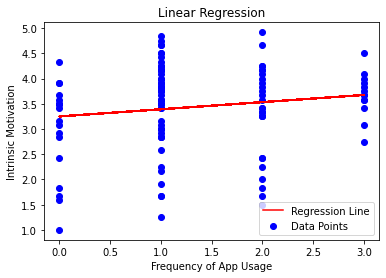

In [28]:
y = data['mean of Intrinsic motivations']
X = data['Frequency Sportapp']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
# Plot the data points
# Plot the data points
plt.scatter(X.iloc[:, 1], y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X.iloc[:, 1], model.predict(X), color='red', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('Frequency of App Usage')
plt.ylabel('Intrinsic Motivation')
plt.title('Linear Regression')

# Add legend
plt.legend()

# Display the plot
plt.savefig('lin_reg.png')
plt.show()

### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in intrinsic motivation among the people who use a Sport-App regulary and not.</span>

In [29]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Frequency Sportapp'] == 0]['Intrinsic Motivation']
group2 = data[data['Frequency Sportapp'] != 0]['Intrinsic Motivation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)


Mann-Whitney U statistic: 683.5
P-value: 0.17803262853756874


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in intrinsic motivation among the people who use a Sport-App regulary and not.</span>

In [30]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Frequency Sportapp'] <2]['Integrated Regulation']
group2 = data[data['Frequency Sportapp'] >=2 ]['Integrated Regulation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1489.0
P-value: 0.8634583429804221


In [31]:

# Separate the data into two groups based on sport app usage
group1 = data[data['Frequency Sportapp'] == 3]['Integrated Regulation']
group2 = data[data['Frequency Sportapp'] != 3]['Integrated Regulation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)


Mann-Whitney U statistic: 737.5
P-value: 0.4314080926823797


### <span style="color:#FF884D"> Spearmanr-Test </span>
### <span> H₀: There is no monotonic relationship between the frequency of using the sports app and intrinsic motivation.</span>

In [32]:
# Extract the relevant columns for app usage frequency and intrinsic motivation
app_usage = data['Frequency Sportapp']
identified_motivation = data['Identified Regulation']

# Perform Spearman's rank correlation test
correlation, p_value = stats.spearmanr(app_usage, identified_motivation)

# Print the results
print("Spearman's correlation coefficient:", correlation)
print("P-value:", p_value)


Spearman's correlation coefficient: 0.17669476357538946
P-value: 0.0611836372485952


### <span style="color:#FF884D"> Mann-Whitneyu-Test RUMGESPIELT</span>
### <span> H₀: There is no difference in intrinsic motivation among the people who use a Sport-App regulary and not.</span>

In [33]:
# Separate the data into two groups based on sport app usage

group1 = data[(data['Frequency Sportapp'] == 0)|(data['Frequency Sportapp'] == 1)]['Intrinsic Motivation']
group2 = data[data['Frequency Sportapp'] == 3]['Intrinsic Motivation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 399.0
P-value: 0.3638894388419842


### <span style="color:#FF884D"> Mann-Whitneyu-Test  RUMGESPIELT</span>
### <span> H₀: There is no difference in intrinsic motivation among the people who use a Sport-App regulary and not.</span>

In [34]:
# Separate the data into two groups based on sport app usage

group1 = data[data['Frequency Sportapp'] <= 0]['mean of Intrinsic motivations']
group2 = data[data['Frequency Sportapp'] > 0]['mean of Intrinsic motivations']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
print(cohens_d(group1, group2))

Mann-Whitney U statistic: 546.5
P-value: 0.015577753558941941
-0.6041940994932872


In [35]:
# Separate the data into two groups based on sport app usage

group1 = data[data['Frequency Sportapp'] <= 0]['External Regulation']
group2 = data[data['Frequency Sportapp'] > 0]['External Regulation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
print(cohens_d(group1, group2))

Mann-Whitney U statistic: 686.5
P-value: 0.1846442192121025
-0.45707568786647285


In [36]:
# Separate the data into two groups based on sport app usage

group1 = data[data['Frequency Sportapp'] <= 0]['Amotivation']
group2 = data[data['Frequency Sportapp'] > 0]['Amotivation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
print(cohens_d(group1, group2))

Mann-Whitney U statistic: 809.0
P-value: 0.7164195377292899
-0.1732842977165066


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in Introjected Regulation among the people who use a Sport-App regulary and not.</span>

In [37]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Frequency Sportapp'] <2]['Introjected Regulation']
group2 = data[data['Frequency Sportapp'] >=2 ]['Introjected Regulation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

Mann-Whitney U statistic: 1311.5
P-value: 0.3713870939042574


In [38]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Frequency Sportapp'] <2 ]['mean of Intrinsic motivations']
group2 = data[data['Frequency Sportapp'] >=2]['mean of Intrinsic motivations']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
print(cohens_d(group1, group2))
# Calculate the effect size

Mann-Whitney U statistic: 1442.5
P-value: 0.9186298752701794
-0.04778409191852482


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in identified regulation among the people who use a Sport-App regulary and not.</span>

In [39]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Frequency Sportapp'] == 0]['Identified Regulation']
group2 = data[data['Frequency Sportapp'] != 0]['Identified Regulation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
print(cohens_d(group1, group2))
# Calculate the effect size

Mann-Whitney U statistic: 436.5
P-value: 0.0009546856989034088
-0.898169531749665


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in intrinsic motivation among the people who use a Sport-App regulary and not.</span>

In [40]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Frequency Sportapp'] == 0]['Intrinsic Motivation']
group2 = data[data['Frequency Sportapp'] != 0]['Intrinsic Motivation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 683.5
P-value: 0.17803262853756874


### <span style="color:#FF884D"> Calculate Mean</span>

In [41]:
mean_intrinsic_0 = data[data['Frequency Sportapp'] == 0][["Intrinsic Motivation", "Identified Regulation","Integrated Regulation"]].mean()
mean_intrinsic_1 = data[data['Frequency Sportapp'] != 0][["Intrinsic Motivation", "Identified Regulation","Integrated Regulation"]].mean()

#mean_intrinsic = data[["Intrinsic Motivation", "Identified Regulation","Integrated Regulation"]].mean()
mean_all_1 = np.mean(mean_intrinsic_1)
mean_all_0 = np.mean(mean_intrinsic_0)

data_mean = pd.DataFrame({'Mean_0_Frequency': [mean_all_0],
                     'Mean_1_Frequency':[mean_all_1]})
data_mean
#mean_all
#mean_intrinsic_0;
#mean_intrinsic_1

,Mean_0_Frequency,Mean_1_Frequency
0,2.990741,3.518421


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in motivation among the people who are more motivated when comparing to friends and people who are not more motivated when comparing to friends.</span>

In [42]:
# Separate the data into two groups based on sport app usage
# linear mixed effect models
# visualize motivations and for what reason ppl used the sport apps
group1 = data[data['Motivation when comparing to friends'] == 'Ja']['mean of Intrinsic motivations']
group2 = data[data['Motivation when comparing to friends'] == 'Nein']['mean of Intrinsic motivations']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))

Mann-Whitney U statistic: 1919.0
P-value: 0.014386936578556568
0.4126320276868538


In [43]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Motivation when comparing to friends'] == 'Ja']['External Regulation']
group2 = data[data['Motivation when comparing to friends'] == 'Nein']['External Regulation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
# Calculate the effect size

print(cohens_d(group1, group2))

Mann-Whitney U statistic: 1900.5
P-value: 0.018726619742956665
0.41659707419517095


In [44]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Motivation when comparing to friends'] == 'Ja']['Introjected Regulation']
group2 = data[data['Motivation when comparing to friends'] == 'Nein']['Introjected Regulation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1724.5
P-value: 0.19265212187307523


In [45]:
# Separate the data into two groups based on sport app usage
group1 = data[data['Motivation when comparing to friends'] == 'Ja']['Amotivation']
group2 = data[data['Motivation when comparing to friends'] == 'Nein']['Amotivation']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1745.0
P-value: 0.149539378328904


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in motivation among the people who do more or exact three types of sports and poeple who do less.</span>

In [46]:
# Separate the data into two groups based on sport app usage
group1 = data[data['numSports'] >= 2]['mean of Intrinsic motivations']
group2 = data[data['numSports'] < 2]['mean of Intrinsic motivations']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Calculate the effect size

Mann-Whitney U statistic: 1820.0
P-value: 0.030743400100218452


In [47]:
# Separate the data into two groups based on sport app usage
group1 = data[data['numSports'] >= 2]['External Regulation']
group2 = data[data['numSports'] < 2]['External Regulation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1510.0
P-value: 0.764851671868096


In [48]:
# Separate the data into two groups based on sport app usage
group1 = data[data['numSports'] >= 2]['Introjected Regulation']
group2 = data[data['numSports'] < 2]['Introjected Regulation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1721.0
P-value: 0.11563864838424047


In [49]:
# Separate the data into two groups based on sport app usage
group1 = data[data['numSports'] >= 2]['Amotivation']
group2 = data[data['numSports'] < 2]['Amotivation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1236.5
P-value: 0.17307282476212782


### <span style="color:#FF884D"> Mann-Whitneyu-Test </span>
### <span> H₀: There is no difference in motivation among the people who track there own performance and the people who do not track there performance.</span>

In [50]:
# Separate the data into two groups based on sport app usage
group1 = data[data['track performance'] == 1]['mean of Intrinsic motivations']
group2 = data[data['track performance'] != 1]['mean of Intrinsic motivations']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1415.0
P-value: 0.1960649005814461


In [51]:
# Separate the data into two groups based on sport app usage
group1 = data[data['track performance'] == 1]['External Regulation']
group2 = data[data['track performance'] != 1]['External Regulation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1416.0
P-value: 0.1913369200804872


In [52]:
# Separate the data into two groups based on sport app usage
group1 = data[data['track performance'] == 1]['Introjected Regulation']
group2 = data[data['track performance'] != 1]['Introjected Regulation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1498.5
P-value: 0.06409538701244916


In [53]:
# Separate the data into two groups based on sport app usage
group1 = data[data['track performance'] == 1]['Amotivation']
group2 = data[data['track performance'] != 1]['Amotivation']
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1207.0
P-value: 0.9440082756531538
